# Class 14 - Markov Clustering

In [15]:
suppressPackageStartupMessages(library(sna))
library(readr)
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(expm))

In [16]:
markov_cluster <- function(graph) {
    adj_mat <- as.matrix(igraph::get.adjacency(graph))
    N <- nrow(adj_mat)
    trans_mat_new <- (adj_mat + diag(N)) %*% solve(diag(igraph::degree(graph)+1))
    trans_mat <- matrix(rep(0, N^2), ncol=N)

    iter_count <- 0
    
    while(norm(trans_mat - trans_mat_new, type="f")/
          norm(0.5*(trans_mat + trans_mat_new), type="f") > 0.01 &&
          iter_count < 20) {
        
        ## the new transition matrix becomes the old transition matrix
        trans_mat <- trans_mat_new
        
        ## expansion step; preserves left-stochastic property of the matrix
        trans_mat_new <- trans_mat_new %*% trans_mat_new
        
        ## inflation step; need to renormalize to restore left-stochastic property
        trans_mat_new <- trans_mat_new^2
        trans_mat_new <- trans_mat_new / matrix(rep(apply(trans_mat_new, 2, sum),N),ncol=N,byrow=TRUE)
        
        iter_count <- iter_count + 1
        print(sprintf("just completed iteration: %d", iter_count))
    }
    
    print(sprintf("Number of iterations for markov clustering: %d", iter_count))
    
    trans_mat_new[trans_mat_new < 1e-10] <- 0
    trans_mat_new[trans_mat_new > 1e-10] <- 1
    
    cluster_signatures <- unique(as.data.frame(t(trans_mat_new)))
    cluster_assignments <- apply(trans_mat_new, 2, function(my_col) {
        which(apply(cluster_signatures, 1, function(my_row) {
            all(my_row == my_col)
        }))
    })
    names(cluster_assignments) <- rownames(adj_mat)
    t(cluster_assignments)
}

In [26]:
test_adjmat <- read.dot("testr.dot")
test_adjmat <- test_adjmat + t(test_adjmat)
test_igraph <- igraph::graph_from_adjacency_matrix(test_adjmat, mode="undirected")
summary(test_igraph)

IGRAPH a447bfa UN-- 13 26 -- 
+ attr: name (v/c)


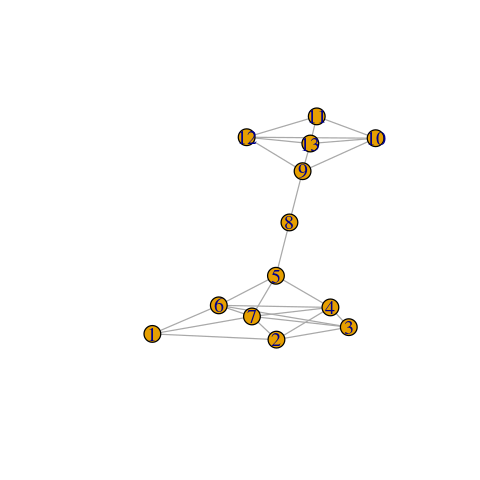

In [23]:
plot(test_igraph)

In [24]:
markov_cluster(test_igraph)

[1] "just completed iteration: 1"
[1] "just completed iteration: 2"
[1] "just completed iteration: 3"
[1] "just completed iteration: 4"
[1] "just completed iteration: 5"
[1] "just completed iteration: 6"
[1] "just completed iteration: 7"
[1] "just completed iteration: 8"
[1] "just completed iteration: 9"
[1] "Number of iterations for markov clustering: 9"


1,2,6,7,4,3,5,8,9,10,12,13,11
1,1,1,1,1,1,1,2,3,3,3,3,3


In [6]:
edge_list_df <- readr::read_tsv("krogan.sif", 
                              col_names=c("protein1","protein2"),
                              col_types=cols())
head(edge_list_df)

protein1,protein2
AAC3,PMR1
AAP1,GUD1
AAP1,TRS31
AAP1,GCN3
AAP1,MDY2
AAR2,SMD1


summary(test_igraph

In [29]:
big_graph <- igraph::graph_from_data_frame(edge_list_df, directed=FALSE)
summary(big_graph)

IGRAPH b7dae93 UN-- 2674 7079 -- 
+ attr: name (v/c)


In [8]:
res <- markov_cluster(big_graph)

[1] "just completed iteration: 1"
[1] "just completed iteration: 2"
[1] "just completed iteration: 3"
[1] "just completed iteration: 4"
[1] "just completed iteration: 5"
[1] "just completed iteration: 6"
[1] "just completed iteration: 7"
[1] "just completed iteration: 8"
[1] "just completed iteration: 9"
[1] "just completed iteration: 10"
[1] "just completed iteration: 11"
[1] "Number of iterations for markov clustering: 11"


In [9]:
head(res)

AAC3,AAP1,AAR2,ABF1,ABF2,ACB1,ACE2,ACF2,ACP1,ACS2,...,JSN1,RBL2,CUE3,PLM2,STE13,ECM3,YPK2,CUP2,MSE1,GSP2
1,2,3,4,5,6,7,8,9,10,...,395,395,810,812,275,762,652,59,59,817


In [10]:
max(res)

[1] 844

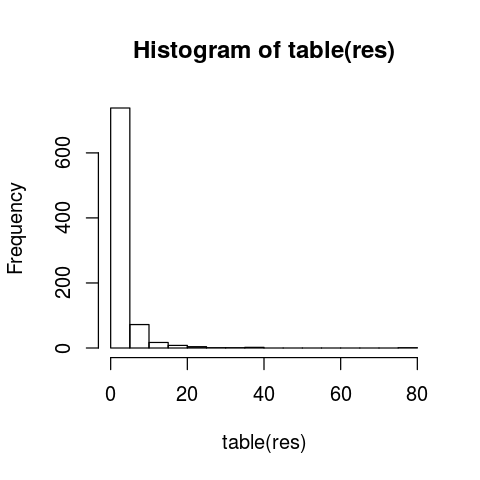

In [11]:
hist(res)